In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plts
import seaborn as sns; sns.set()
import pandas as pd

import os

In [2]:
train = pd.read_csv('{}/aiffel/Case.csv'.format(os.getenv('HOME')))
#test = pd.read_csv('{}/aiffel/bike_sharing_demand_test.csv'.format(os.getenv('HOME')))
train.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [35]:
provi = pd.read_csv('{}/aiffel/Region.csv'.format(os.getenv('HOME')))

In [36]:
provi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [38]:
provi[:-1]

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
238,61150,Gyeongsangnam-do,Hadong-gun,35.067224,127.751271,16,15,0,0.84,32.89,19.1,94
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96


In [39]:
provi.drop_duplicates(["province"])

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
43,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
52,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
58,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497
69,15000,Daejeon,Daejeon,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984
75,16000,Ulsan,Ulsan,35.539797,129.311538,119,200,4,2.21,11.76,5.2,1801
81,17000,Sejong,Sejong,36.480132,127.289021,48,60,3,1.78,9.48,3.8,491
82,20000,Gyeonggi-do,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
114,30000,Gangwon-do,Gangwon-do,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519


In [40]:
p1 = provi.drop_duplicates(["province"])

In [97]:
cityp = provi.drop_duplicates(["city"])

In [98]:

clat = cityp.latitude
clon = cityp.longitude

In [117]:
clat = pd.to_numeric(clat,errors='coerce')
clon = pd.to_numeric(clon,errors='coerce')

In [109]:
t1.dtypes

dtype('int64')

In [110]:
t1 = pd.to_numeric(t1,errors='coerce')

In [115]:
clat.dtypes

dtype('float64')

In [116]:
clon.dtypes

dtype('float64')

In [41]:
pv = p1.province
pla = p1.latitude
plo = p1.longitude

In [45]:
nurse = p1.nursing_home_count

In [47]:
elderly = p1.elderly_population_ratio

In [50]:
eldratio = p1.elderly_alone_ratio

In [86]:
elderly[:10]

0      15.38
26     18.41
43     15.78
52     13.57
58     13.20
69     13.65
75     11.76
81      9.48
82     12.63
114    19.89
Name: elderly_population_ratio, dtype: float64

In [87]:
eldratio[:10]

0      5.8
26     8.6
43     7.5
52     6.4
58     5.8
69     5.8
75     5.2
81     3.8
82     5.2
114    9.8
Name: elderly_alone_ratio, dtype: float64

In [88]:
edif = elderly-eldratio

In [43]:
pv1 = pd.to_numeric(pv,errors='coerce')

/tmp/ipykernel_45/3764780085.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')


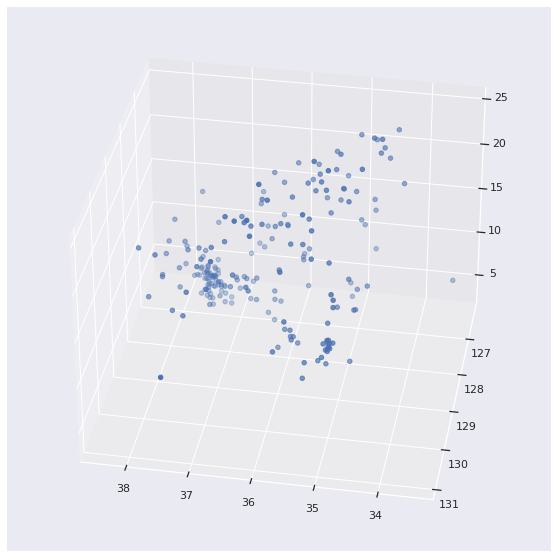

In [131]:

fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(clat, clon, cityp.elderly_alone_ratio)
ax1.view_init(33, 100)

/tmp/ipykernel_45/1041322950.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')


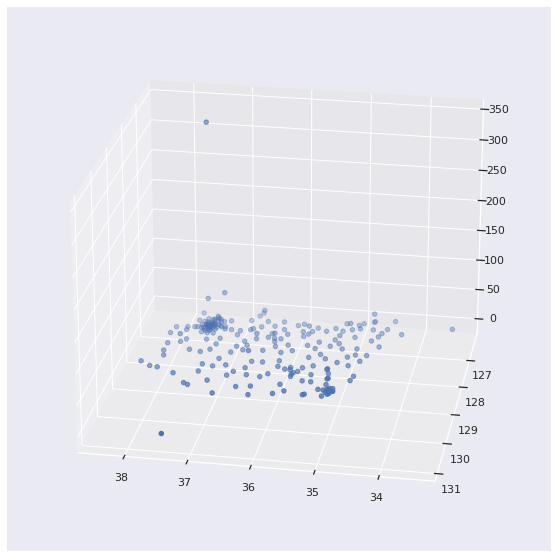

In [133]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(clat, clon, cityp.university_count)
ax1.view_init(23, 100)

/tmp/ipykernel_45/2106730212.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2 = fig2.gca(projection = '3d')


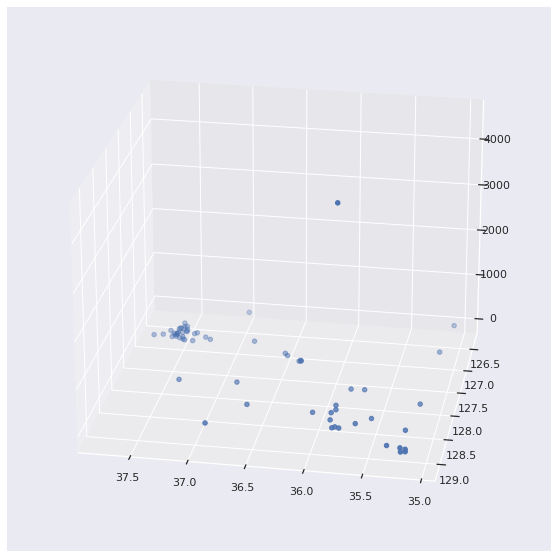

In [134]:
fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.gca(projection = '3d')
ax2.scatter(t2,t3,t1)
ax2.view_init(23, 100)

/tmp/ipykernel_45/452010252.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')


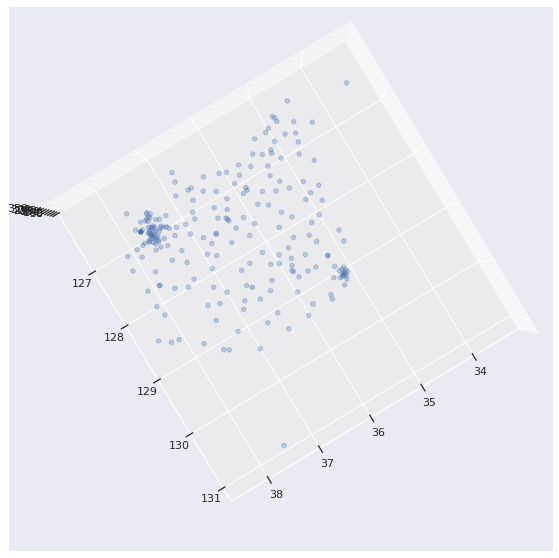

In [127]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(clat, clon, cityp.university_count)
ax1.view_init(90, 55)

/tmp/ipykernel_45/1227720846.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')
/tmp/ipykernel_45/1227720846.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2 = fig2.gca(projection = '3d')


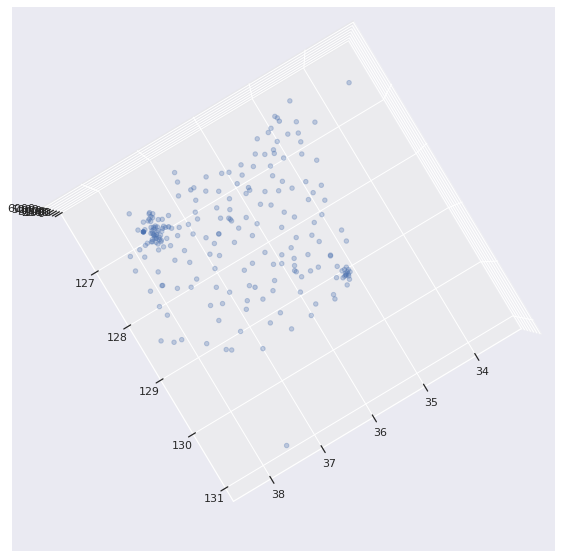

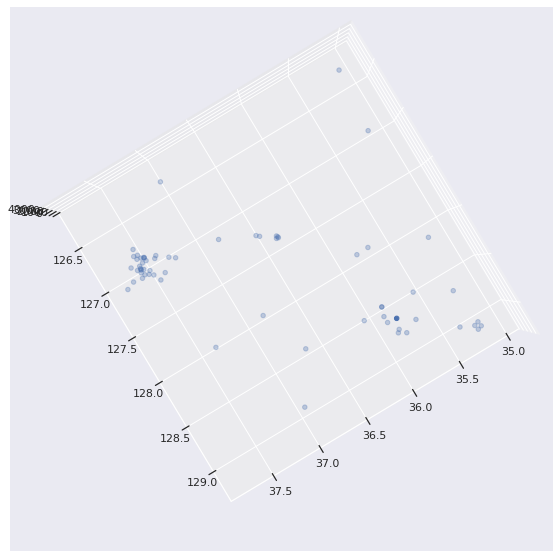

In [121]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(clat, clon, cityp.elementary_school_count)
ax1.view_init(90, 55)

fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.gca(projection = '3d')
ax2.scatter(t2,t3,t1)
ax2.view_init(90, 55)

/tmp/ipykernel_45/1123195214.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')
/tmp/ipykernel_45/1123195214.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2 = fig2.gca(projection = '3d')


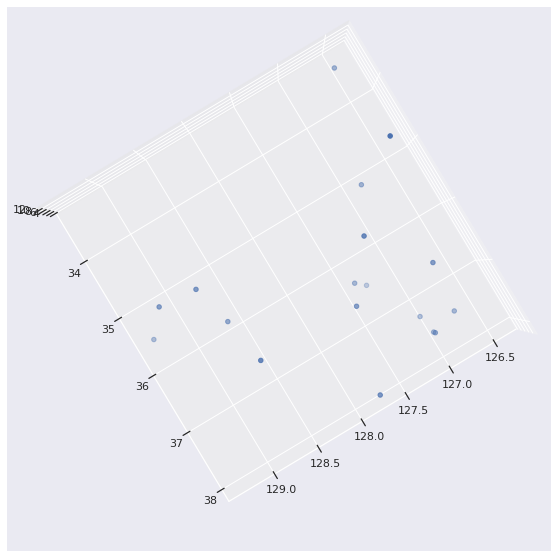

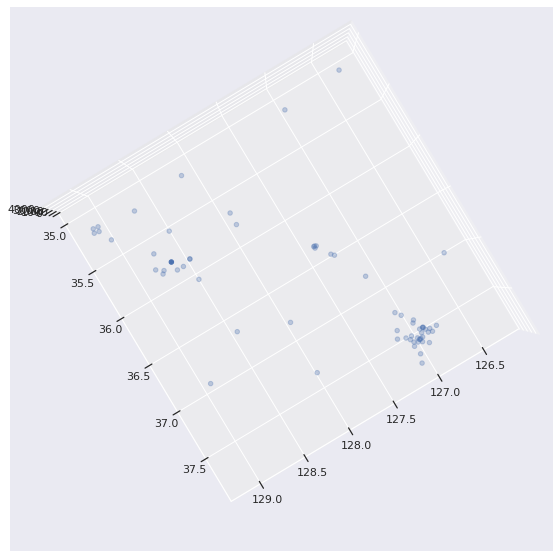

In [96]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(plo,pla, eldratio)
ax1.view_init(90, 55)

fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.gca(projection = '3d')
ax2.scatter(t3,t2,t1)
ax2.view_init(90, 55)

/tmp/ipykernel_45/1925414531.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')
/tmp/ipykernel_45/1925414531.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2 = fig2.gca(projection = '3d')


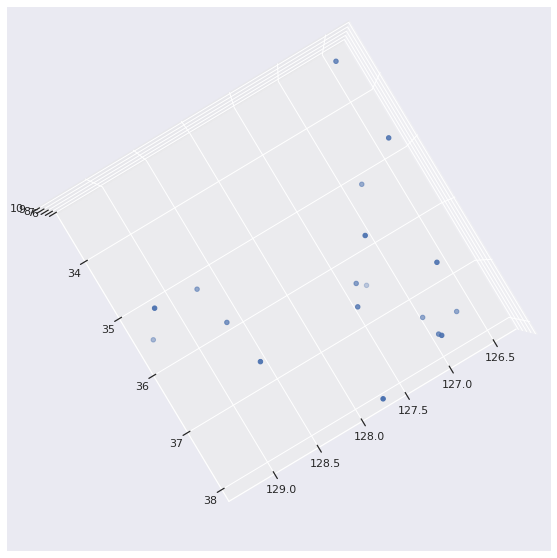

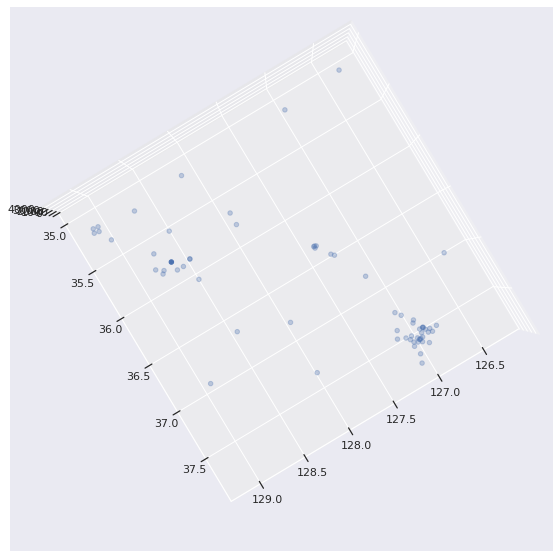

In [95]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(plo,pla, edif)
ax1.view_init(90, 55)

fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.gca(projection = '3d')
ax2.scatter(t3,t2,t1)
ax2.view_init(90, 55)

/tmp/ipykernel_45/3961314498.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')
/tmp/ipykernel_45/3961314498.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2 = fig.gca(projection = '3d')


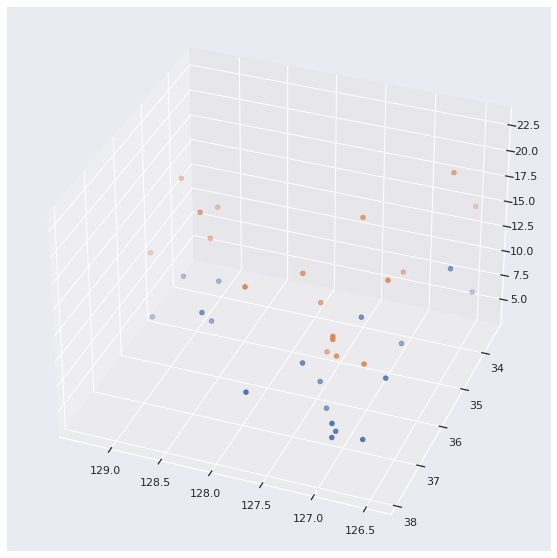

<Figure size 1440x720 with 0 Axes>

In [85]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(plo,pla, eldratio)
ax1.view_init(33, 111)

fig2 = plt.figure(figsize=(20,10))
ax2 = fig.gca(projection = '3d')
ax2.scatter(plo,pla, elderly)
ax2.view_init(33, 111)

/tmp/ipykernel_45/1375179019.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')
/tmp/ipykernel_45/1375179019.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2 = fig.gca(projection = '3d')


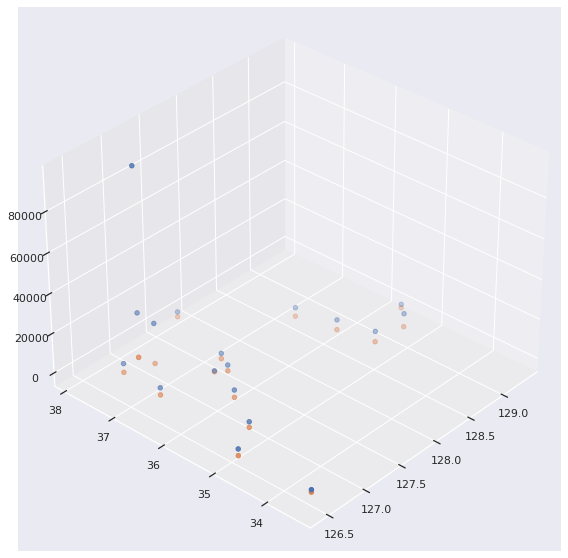

<Figure size 1440x720 with 0 Axes>

In [79]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(plo,pla, nurse)
ax1.view_init(33,222)

fig2 = plt.figure(figsize=(20,10))
ax2 = fig.gca(projection = '3d')
ax2.scatter(plo,pla, elderly)
ax2.view_init(33,222)

# fig3 = plt.figure(figsize=(20,10))

# ax3 = fig3.add_subplot(projection='3d')
# ax3.scatter(plo,pla, eldratio)
# ax3.view_init(33,222)



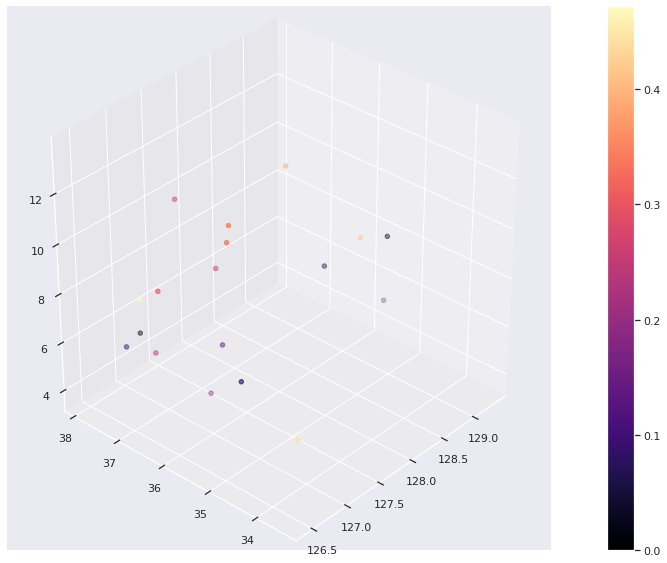

In [74]:
fig3 = plt.figure(figsize=(20,10))
c = np.arange(len(elderly)) / len(elderly)
ax3 = fig3.add_subplot(projection='3d')
p = ax3.scatter(plo,pla, eldratio, c=0.5*c, cmap=plt.cm.magma)
ax3.view_init(33,222)


data = np.random.rand(3, 100)
ax3.set_box_aspect([np.ptp(i) for i in data])  # equal aspect ratio

fig3.colorbar(p, ax =ax3)

/tmp/ipykernel_45/2276527652.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')


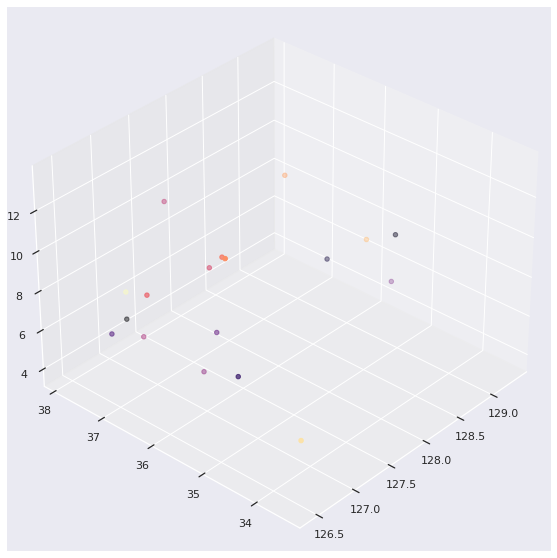

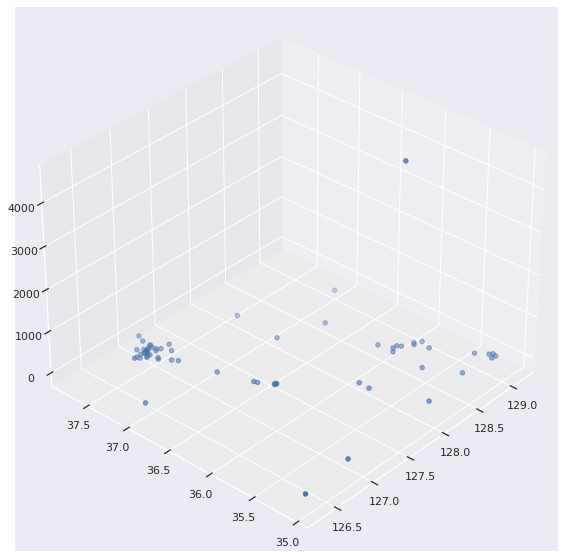

In [76]:
fig3 = plt.figure(figsize=(20,10))
c = np.arange(len(eldratio)) / len(eldratio)
ax3 = fig3.add_subplot(projection='3d')
ax3.scatter(plo,pla, eldratio, c =0.5*c, cmap=plt.cm.magma)
ax3.view_init(33,222)

# ax3.set_box_aspect([np.ptp(i) for i in elderly])  # equal aspect ratio

# fig3.colorbar(p, ax=ax)

fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(t3,t2,t1)
ax1.view_init(33,222)

In [34]:
train[:-30]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
139,5000005,Jeollabuk-do,-,False,etc,5,-,-
140,5100001,Jeollanam-do,Muan-gun,True,Manmin Central Church,2,35.078825,126.316746
141,5100002,Jeollanam-do,from other city,True,Shincheonji Church,1,-,-
142,5100003,Jeollanam-do,-,False,overseas inflow,14,-,-


In [107]:
t1 = train.confirmed

In [108]:
t1

0      139
1      119
2       95
3       43
4       43
      ... 
169     20
170     14
171      0
172      4
173      1
Name: confirmed, Length: 174, dtype: int64

In [14]:
t1 = pd.DataFrame(train['confirmed'])

In [15]:
t1

,confirmed
0,139
1,119
2,95
3,43
4,43
...,...
169,20
170,14
171,0
172,4


In [3]:
train[:30]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
5,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
6,1000007,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
7,1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
8,1000009,Seoul,from other city,True,Coupang Logistics Center,25,-,-
9,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [5]:
train.astype({'latitude':'int','longitude':'int'})

ValueError: invalid literal for int() with base 10: '37.538621'

In [6]:
t2 = pd.to_numeric(train.latitude,errors='coerce')


In [7]:
t3 = pd.to_numeric(train.longitude,errors='coerce')



In [10]:
#t1 = pd.DataFrame(train['confirmed'])

In [8]:
t3[:1]

0    126.992652
Name: longitude, dtype: float64

/tmp/ipykernel_45/3875429154.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection = '3d')


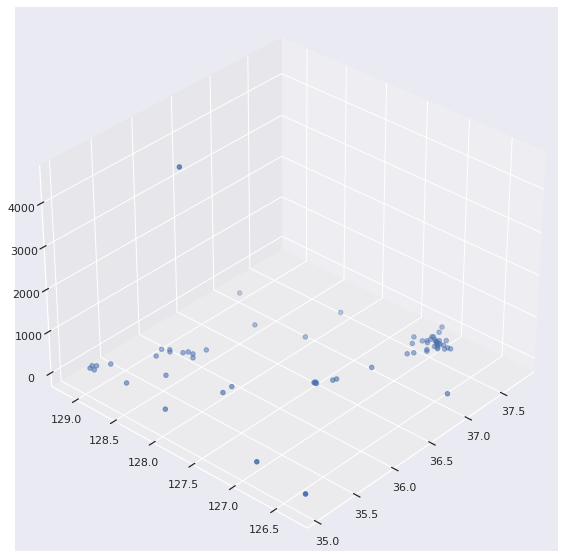

In [21]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.gca(projection = '3d')
ax1.scatter(t2,t3,t1)
ax1.view_init(33,222)
